In [1]:
!nvidia-smi -L

GPU 0: Tesla T4 (UUID: GPU-18d225bc-e90b-6a9d-cc32-d98c4494732d)


In [2]:
import tensorflow_datasets as tfds

In [3]:
datasets_list=tfds.list_builders()
print("food101") in datasets_list

food101


False

In [4]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

--2023-08-05 15:32:28--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2023-08-05 15:32:29 (91.8 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [5]:
from helper_functions import create_tensorboard_callback, plot_loss_curves, compare_historys

In [6]:
(train_data,test_data),ds_info=tfds.load(name="food101",
                                         split=["train","validation"],
                                         shuffle_files=False,
                                         as_supervised=True,
                                         with_info=True)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Shuffling /root/tensorflow_datasets/food101/2.0.0.incompleteYHIDAU/food101-train.tfrecord*...:   0%|          …

Generating validation examples...:   0%|          | 0/25250 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/food101/2.0.0.incompleteYHIDAU/food101-validation.tfrecord*...:   0%|     …

Dataset food101 downloaded and prepared to /root/tensorflow_datasets/food101/2.0.0. Subsequent calls will reuse this data.


In [7]:
class_names=ds_info.features["label"].names
class_names[:10]

['apple_pie',
 'baby_back_ribs',
 'baklava',
 'beef_carpaccio',
 'beef_tartare',
 'beet_salad',
 'beignets',
 'bibimbap',
 'bread_pudding',
 'breakfast_burrito']

In [8]:
ds_info.features

FeaturesDict({
    'image': Image(shape=(None, None, 3), dtype=uint8),
    'label': ClassLabel(shape=(), dtype=int64, num_classes=101),
})

In [9]:
train_one_sample=train_data.take(1)
train_one_sample

<_TakeDataset element_spec=(TensorSpec(shape=(None, None, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>

In [10]:
for image,label in train_one_sample:
  print(f"""
  Image Shape:{image.shape},
  Image datatype:{image.dtype},
  Target class from class101(tensor form):{label},
  class name(str form):{class_names[label.numpy()]}
  """)


  Image Shape:(512, 512, 3),
  Image datatype:<dtype: 'uint8'>,
  Target class from class101(tensor form):56,
  class name(str form):huevos_rancheros
  


In [11]:
image

<tf.Tensor: shape=(512, 512, 3), dtype=uint8, numpy=
array([[[233, 253, 251],
        [231, 253, 250],
        [228, 254, 251],
        ...,
        [ 85,  82,  89],
        [ 68,  67,  75],
        [ 57,  57,  67]],

       [[232, 254, 252],
        [229, 254, 251],
        [226, 255, 251],
        ...,
        [121, 116, 120],
        [100,  99, 104],
        [ 86,  85,  91]],

       [[228, 254, 253],
        [226, 255, 253],
        [223, 255, 252],
        ...,
        [164, 159, 155],
        [145, 141, 138],
        [128, 127, 125]],

       ...,

       [[ 66, 112, 164],
        [ 67, 113, 163],
        [ 55,  99, 148],
        ...,
        [  5,  14,  23],
        [  9,  18,  27],
        [  8,  17,  26]],

       [[ 76, 123, 177],
        [ 75, 122, 176],
        [ 70, 116, 168],
        ...,
        [  5,  14,  23],
        [  9,  18,  25],
        [  7,  16,  23]],

       [[ 80, 129, 185],
        [ 71, 121, 174],
        [ 74, 121, 175],
        ...,
        [  7,  16,  2

In [12]:
import tensorflow as tf
tf.reduce_min(image),tf.reduce_max(image)

(<tf.Tensor: shape=(), dtype=uint8, numpy=0>,
 <tf.Tensor: shape=(), dtype=uint8, numpy=255>)

(-0.5, 511.5, 511.5, -0.5)

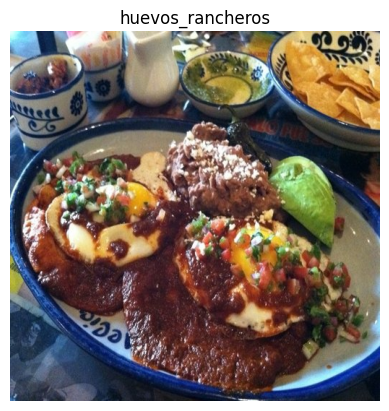

In [13]:
#plot a training sample
import matplotlib.pyplot as plt
plt.imshow(image)
plt.title(class_names[label.numpy()])
plt.axis(False)

In [14]:
#preprocessing data
def preprocess_img(image,label,img_shape=224):
  image=tf.image.resize(image,[img_shape,img_shape])
  return tf.cast(image,tf.float32),label

In [15]:
preprocessed_img=preprocess_img(image,label)[0]#we want only image
print(f"Image before pre processing:\n{image[:2]}....,\nShape:{image.shape},\nDataType:{image.dtype}")
print(f"Image after pre processing:\n{preprocessed_img[:2]}....,Shape:{preprocessed_img.shape},\nDataType:{preprocessed_img.dtype}")

Image before pre processing:
[[[233 253 251]
  [231 253 250]
  [228 254 251]
  ...
  [ 85  82  89]
  [ 68  67  75]
  [ 57  57  67]]

 [[232 254 252]
  [229 254 251]
  [226 255 251]
  ...
  [121 116 120]
  [100  99 104]
  [ 86  85  91]]]....,
Shape:(512, 512, 3),
DataType:<dtype: 'uint8'>
Image after pre processing:
[[[230.65816 253.64285 251.     ]
  [222.99998 254.97449 252.19388]
  [207.06633 255.      250.36734]
  ...
  [140.66287 129.52519 121.22428]
  [121.14268 115.26515 116.95397]
  [ 83.95363  83.08119  89.63737]]

 [[221.47449 254.37755 253.33163]
  [214.5102  255.      253.92348]
  [198.41327 254.58673 251.96939]
  ...
  [208.66318 195.82143 173.40823]
  [197.03056 190.1071  174.83162]
  [175.54036 171.6169  161.21384]]]....,Shape:(224, 224, 3),
DataType:<dtype: 'float32'>


In [16]:
train_data=train_data.map(map_func=preprocess_img, num_parallel_calls=tf.data.AUTOTUNE)
train_data=train_data.shuffle(buffer_size=1000).batch(batch_size=32).prefetch(buffer_size=tf.data.AUTOTUNE)

test_data=test_data.map(preprocess_img, num_parallel_calls=tf.data.AUTOTUNE)
test_data=test_data.batch(32).prefetch(tf.data.AUTOTUNE)

In [17]:
train_data,test_data

(<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>,
 <_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>)

In [18]:
#creating model checkpoints
checkpoint_path="model_checkpoints/cp.ckpt"
model_checkpoint=tf.keras.callbacks.ModelCheckpoint(checkpoint_path,monitor="val_acc",save_best_only=True,save_weights_only=True,verbose=0)

In [19]:
#turning on mixed precision training
from tensorflow.keras import mixed_precision
mixed_precision.set_global_policy("mixed_float16")#sets global data policy to mixed precision

In [20]:
mixed_precision.global_policy()

<Policy "mixed_float16">

In [21]:
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

#create base model
input_shape=(224,224,3)
base_model=tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable=False

#create functional model
inputs=layers.Input(input_shape,name="input_layer")
x=base_model(inputs,training=False)
x=layers.GlobalAveragePooling2D()(x)
x=layers.Dense(len(class_names))(x)
output=layers.Activation(activation="softmax",dtype=tf.float32,name="output")(x)
model=tf.keras.Model(inputs,output)

16705208/16705208 [==============================] - 2s 0us/step


In [22]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

In [23]:
for layer in model.layers:
  print(layer.name,layer.trainable,layer.dtype,layer.dtype_policy)

input_layer True float32 <Policy "float32">
efficientnetb0 False float32 <Policy "mixed_float16">
global_average_pooling2d True float32 <Policy "mixed_float16">
dense True float32 <Policy "mixed_float16">
output True float32 <Policy "float32">


In [24]:
for layer in base_model.layers:
  print(layer.name,layer.trainable,layer.dtype,layer.dtype_policy)

input_1 False float32 <Policy "float32">
rescaling False float32 <Policy "mixed_float16">
normalization False float32 <Policy "mixed_float16">
rescaling_1 False float32 <Policy "mixed_float16">
stem_conv_pad False float32 <Policy "mixed_float16">
stem_conv False float32 <Policy "mixed_float16">
stem_bn False float32 <Policy "mixed_float16">
stem_activation False float32 <Policy "mixed_float16">
block1a_dwconv False float32 <Policy "mixed_float16">
block1a_bn False float32 <Policy "mixed_float16">
block1a_activation False float32 <Policy "mixed_float16">
block1a_se_squeeze False float32 <Policy "mixed_float16">
block1a_se_reshape False float32 <Policy "mixed_float16">
block1a_se_reduce False float32 <Policy "mixed_float16">
block1a_se_expand False float32 <Policy "mixed_float16">
block1a_se_excite False float32 <Policy "mixed_float16">
block1a_project_conv False float32 <Policy "mixed_float16">
block1a_project_bn False float32 <Policy "mixed_float16">
block2a_expand_conv False float32 <

In [25]:
history_101_food_classes_feature_extraction=model.fit(train_data,
                                                      epochs=3,
                                                      steps_per_epoch=len(train_data),
                                                      validation_data=test_data,
                                                      validation_steps=int(0.15*len(test_data)),
                                                      callbacks=[create_tensorboard_callback("training_logs","efficientNetB0_101_classes_feature_extraction"),
                                                                 model_checkpoint])

Saving TensorBoard log files to: training_logs/efficientNetB0_101_classes_feature_extraction/20230805-154650
Epoch 1/3
2368/2368 [==============================] - ETA: 0s - loss: 1.7177 - accuracy: 0.5812

2368/2368 [==============================] - 209s 80ms/step - loss: 1.7177 - accuracy: 0.5812 - val_loss: 1.1306 - val_accuracy: 0.6976
Epoch 2/3
2368/2368 [==============================] - ETA: 0s - loss: 1.2010 - accuracy: 0.6886

2368/2368 [==============================] - 194s 80ms/step - loss: 1.2010 - accuracy: 0.6886 - val_loss: 1.0317 - val_accuracy: 0.7161
Epoch 3/3
2367/2368 [============================>.] - ETA: 0s - loss: 1.0561 - accuracy: 0.7231

2368/2368 [==============================] - 204s 84ms/step - loss: 1.0562 - accuracy: 0.7231 - val_loss: 0.9993 - val_accuracy: 0.7272


In [26]:
results_feature_extract_model=model.evaluate(test_data)
results_feature_extract_model

790/790 [==============================] - 56s 71ms/step - loss: 1.0106 - accuracy: 0.7265


[1.0106005668640137, 0.7264950275421143]

In [27]:
#checking the dtype of layers in base_model
for layer in model.layers:
  print(layer.name,layer.dtype,layer.dtype_policy)

input_layer float32 <Policy "float32">
efficientnetb0 float32 <Policy "mixed_float16">
global_average_pooling2d float32 <Policy "mixed_float16">
dense float32 <Policy "mixed_float16">
output float32 <Policy "float32">


In [28]:
#checking loaded model performaance
loaded_model_performance=model.evaluate(test_data)
loaded_model_performance

790/790 [==============================] - 55s 70ms/step - loss: 1.0106 - accuracy: 0.7265


[1.0106005668640137, 0.7264950275421143]

In [29]:
import numpy as np
np.isclose(np.array(loaded_model_performance),np.array(results_feature_extract_model))

array([ True,  True])

In [30]:
# Download the saved model from Google Storage
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/07_efficientnetb0_feature_extract_model_mixed_precision.zip

--2023-08-05 15:59:15--  https://storage.googleapis.com/ztm_tf_course/food_vision/07_efficientnetb0_feature_extract_model_mixed_precision.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.200.128, 74.125.68.128, 64.233.170.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.200.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 16976857 (16M) [application/zip]
Saving to: ‘07_efficientnetb0_feature_extract_model_mixed_precision.zip’

07_efficientnetb0_f 100%[===================>]  16.19M  8.25MB/s    in 2.0s    

2023-08-05 15:59:19 (8.25 MB/s) - ‘07_efficientnetb0_feature_extract_model_mixed_precision.zip’ saved [16976857/16976857]



In [31]:
!mkdir downloaded_gs_model
!unzip 07_efficientnetb0_feature_extract_model_mixed_precision.zip -d downloaded_gs_model

Archive:  07_efficientnetb0_feature_extract_model_mixed_precision.zip
   creating: downloaded_gs_model/07_efficientnetb0_feature_extract_model_mixed_precision/
   creating: downloaded_gs_model/07_efficientnetb0_feature_extract_model_mixed_precision/variables/
  inflating: downloaded_gs_model/07_efficientnetb0_feature_extract_model_mixed_precision/variables/variables.data-00000-of-00001  
  inflating: downloaded_gs_model/07_efficientnetb0_feature_extract_model_mixed_precision/variables/variables.index  
  inflating: downloaded_gs_model/07_efficientnetb0_feature_extract_model_mixed_precision/saved_model.pb  
   creating: downloaded_gs_model/07_efficientnetb0_feature_extract_model_mixed_precision/assets/


In [32]:
model_path="/content/07_efficientnetb0_feature_extract_model_mixed_precision.zip"
from helper_functions import unzip_data
unzip_data(model_path)
gs_model=tf.keras.models.load_model(model_path.split(".")[0])
gs_model_results=gs_model.evaluate(test_data)
gs_model_results

790/790 [==============================] - 59s 72ms/step - loss: 1.0881 - accuracy: 0.7066


[1.088099718093872, 0.7066138386726379]

In [33]:
#summary of downloaded model
gs_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 efficientnetb0 (Functional)  (None, None, None, 1280)  4049571  
                                                                 
 pooling_layer (GlobalAverag  (None, 1280)             0         
 ePooling2D)                                                     
                                                                 
 dense (Dense)               (None, 101)               129381    
                                                                 
 softmax_float32 (Activation  (None, 101)              0         
 )                                                               
                                                                 
Total params: 4,178,952
Trainable params: 129,381
Non-trainab

In [34]:
#unfreezing all layers in downloaded model
gs_model.trainable=True

In [35]:
for layers in gs_model.layers:
  print(layers.name,layers.dtype)

input_layer float32
efficientnetb0 float32
pooling_layer float32
dense float32
softmax_float32 float32


In [36]:
#create early stopping callback
import tensorflow as tf
early_stopper=tf.keras.callbacks.EarlyStopping(monitor="val_accuracy",patience=3)

In [37]:
#creating a model checkpoint
checkpoint_path="gs_model_checkpoint/cp.cpkt"
gs_checkpoint=tf.keras.callbacks.ModelCheckpoint(checkpoint_path,monitor="val_acc",save_best_only=True,save_weights_only=True,verbose=0)

In [38]:
#compiling the fine tuned model with 10x lower learning rate
gs_model.compile(loss="sparse_categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              metrics=["accuracy"])

In [39]:
default_epochs=100
history_food_vision=gs_model.fit(train_data,
                                 epochs=default_epochs,
                                 validation_data=test_data,
                                 validation_steps=int(len(test_data)*0.15),
                                 initial_epoch=history_101_food_classes_feature_extraction.epoch[-1],
                                 callbacks=[create_tensorboard_callback("training_logs","foodVisionFineTuned"),early_stopper])

Saving TensorBoard log files to: training_logs/foodVisionFineTuned/20230805-160056
Epoch 3/100
2368/2368 [==============================] - 436s 156ms/step - loss: 0.9236 - accuracy: 0.7515 - val_loss: 0.8272 - val_accuracy: 0.7709
Epoch 4/100
2368/2368 [==============================] - 371s 154ms/step - loss: 0.5673 - accuracy: 0.8430 - val_loss: 0.8391 - val_accuracy: 0.7783
Epoch 5/100
2368/2368 [==============================] - 366s 153ms/step - loss: 0.3134 - accuracy: 0.9124 - val_loss: 0.8730 - val_accuracy: 0.7921
Epoch 6/100
2368/2368 [==============================] - 377s 157ms/step - loss: 0.1611 - accuracy: 0.9528 - val_loss: 1.0493 - val_accuracy: 0.7757
Epoch 7/100
2368/2368 [==============================] - 368s 154ms/step - loss: 0.1075 - accuracy: 0.9662 - val_loss: 1.1326 - val_accuracy: 0.7789
Epoch 8/100
2368/2368 [==============================] - 369s 154ms/step - loss: 0.0794 - accuracy: 0.9744 - val_loss: 1.1880 - val_accuracy: 0.7760


In [40]:
gs_model.save("fineTunedFoodVision")

In [41]:
fine_tuned_results_food_vision=gs_model.evaluate(test_data)
fine_tuned_results_food_vision

790/790 [==============================] - 56s 70ms/step - loss: 1.1983 - accuracy: 0.7718


[1.198301911354065, 0.7717623710632324]

In [42]:
#uploading in tensorBoard
!tensorboard dev upload --logdir ./training_logs/ \
--name "FoodVision efficientNet fine tuned model"\
--description "A fine tuned efficientNetB0 model for the food101 dataset"\
--one_shot

2023-08-05 16:40:57.097370: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT

***** TensorBoard Uploader *****

This will upload your TensorBoard logs to https://tensorboard.dev/ from
the following directory:

./training_logs/

This TensorBoard will be visible to everyone. Do not upload sensitive
data.

Your use of this service is subject to Google's Terms of Service
<https://policies.google.com/terms> and Privacy Policy
<https://policies.google.com/privacy>, and TensorBoard.dev's Terms of Service
<https://tensorboard.dev/policy/terms/>.

This notice will not be shown again while you are logged into the uploader.
To log out, run `tensorboard dev auth revoke`.

Continue? (yes/NO) yes

To sign in with the TensorBoard uploader:

1. On your computer or phone, visit:

   https://www.google.com/device

2. Sign in with your Google account, then enter:

   TYP-MQG-ZFN



New experiment created. View your TensorBoard at: https://tensorboard.dev/exp

In [43]:
pred_probs=gs_model.predict(test_data,verbose=1)
pred_classes=pred_probs.argmax(axis=1)

790/790 [==============================] - 58s 70ms/step


In [44]:
#fetch the labels of the test data
y_labels=[]
for images,labels in test_data.unbatch():
  y_labels.append(labels.numpy())
len(y_labels)

25250

In [45]:
np.array(y_labels),pred_classes

(array([29, 81, 91, ..., 76, 31, 21]), array([29, 81, 91, ..., 46, 31, 21]))

In [46]:
#precision recall and f1 scores for each class
from sklearn.metrics import classification_report
print(classification_report(np.array(y_labels),pred_classes))

              precision    recall  f1-score   support

           0       0.70      0.51      0.59       250
           1       0.73      0.78      0.75       250
           2       0.94      0.78      0.85       250
           3       0.87      0.77      0.82       250
           4       0.78      0.73      0.76       250
           5       0.73      0.64      0.68       250
           6       0.78      0.89      0.83       250
           7       0.87      0.90      0.88       250
           8       0.60      0.59      0.59       250
           9       0.85      0.58      0.69       250
          10       0.71      0.72      0.72       250
          11       0.82      0.85      0.84       250
          12       0.71      0.89      0.79       250
          13       0.71      0.84      0.77       250
          14       0.61      0.83      0.70       250
          15       0.59      0.68      0.63       250
          16       0.63      0.70      0.66       250
          17       0.72    

In [47]:
#Build a confusion matrix for each of the classes.
import itertools
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix

# Our function needs a different name to sklearn's plot_confusion_matrix
def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15, norm=False, savefig=False):
  """Makes a labelled confusion matrix comparing predictions and ground truth labels.

  If classes is passed, confusion matrix will be labelled, if not, integer class values
  will be used.

  Args:
    y_true: Array of truth labels (must be same shape as y_pred).
    y_pred: Array of predicted labels (must be same shape as y_true).
    classes: Array of class labels (e.g. string form). If `None`, integer labels are used.
    figsize: Size of output figure (default=(10, 10)).
    text_size: Size of output figure text (default=15).
    norm: normalize values or not (default=False).
    savefig: save confusion matrix to file (default=False).

  Returns:
    A labelled confusion matrix plot comparing y_true and y_pred.

  Example usage:
    make_confusion_matrix(y_true=test_labels, # ground truth test labels
                          y_pred=y_preds, # predicted labels
                          classes=class_names, # array of class label names
                          figsize=(15, 15),
                          text_size=10)
  """
  # Create the confustion matrix
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
  n_classes = cm.shape[0] # find the number of classes we're dealing with

  # Plot the figure and make it pretty
  fig, ax = plt.subplots(figsize=figsize)
  cax = ax.matshow(cm, cmap=plt.cm.Blues) # colors will represent how 'correct' a class is, darker == better
  fig.colorbar(cax)

  # Are there a list of classes?
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])

  # Label the axes
  ax.set(title="Confusion Matrix",
         xlabel="Predicted label",
         ylabel="True label",
         xticks=np.arange(n_classes), # create enough axis slots for each class
         yticks=np.arange(n_classes),
         xticklabels=labels, # axes will labeled with class names (if they exist) or ints
         yticklabels=labels)

  # Make x-axis labels appear on bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  ### Added: Rotate xticks for readability & increase font size (required due to such a large confusion matrix)
  plt.xticks(rotation=70, fontsize=text_size)
  plt.yticks(fontsize=text_size)

  # Set the threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    if norm:
      plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
              horizontalalignment="center",
              color="white" if cm[i, j] > threshold else "black",
              size=text_size)
    else:
      plt.text(j, i, f"{cm[i, j]}",
              horizontalalignment="center",
              color="white" if cm[i, j] > threshold else "black",
              size=text_size)

  # Save the figure to the current working directory
  if savefig:
    fig.savefig("confusion_matrix.png")

make_confusion_matrix(y_true=y_labels,
                      y_pred=pred_classes,
                      classes=class_names,
                      figsize=(100, 100),
                      text_size=20,
                      norm=False,
                      savefig=True)

In [48]:
import pandas as pd
pred_df=pd.DataFrame({"y_true":y_labels,
                      "y_pred":pred_classes,
                      "pred_conf":pred_probs.max(axis=1),
                      "y_true_classname":[class_names[i] for i in y_labels],
                      "y_pred_classname":[class_names[i] for i in pred_classes]})
pred_df["pred_correct"]=pred_df["y_true"]==pred_df["y_pred"]

#sort dataframe in wrong predictions
top_wrong=pred_df[pred_df["pred_correct"]==False].sort_values("pred_conf",ascending=False)
top_wrong.head(100)

,y_true,y_pred,pred_conf,y_true_classname,y_pred_classname,pred_correct
13884,46,10,1.000000,garlic_bread,bruschetta,False
9735,87,30,1.000000,scallops,deviled_eggs,False
23471,71,65,1.000000,paella,mussels,False
7455,43,68,1.000000,fried_calamari,onion_rings,False
15437,56,66,1.000000,huevos_rancheros,nachos,False
...,...,...,...,...,...,...
20763,5,11,0.999871,beet_salad,caesar_salad,False
1218,71,65,0.999869,paella,mussels,False
3847,76,13,0.999867,pizza,caprese_salad,False
24065,83,29,0.999862,red_velvet_cake,cup_cakes,False
